In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
cv2.__version__

'3.4.2'

In [3]:
ruta_img = "lenna.png"
image = cv2.imread(ruta_img)

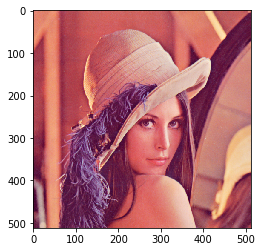

In [4]:
cv_gray = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(cv_gray)
plt.show()

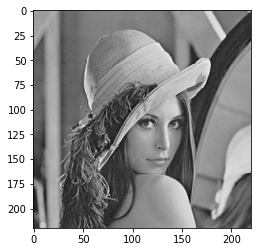

In [36]:
cv_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv_gray_plot = cv2.cvtColor(cv_gray, cv2.COLOR_GRAY2BGR)
plt.imshow(cv_gray_plot)
plt.show()

## HoG (Histograms of Gradients)

In [5]:
hog = cv2.HOGDescriptor()

In [6]:
fv_hog = hog.compute(cv_gray)

In [10]:
fv_hog

array([[0.15122215],
       [0.15462464],
       [0.21175016],
       ...,
       [0.03569411],
       [0.0984415 ],
       [0.10657953]], dtype=float32)

In [8]:
fv_hog.shape

(10557540, 1)

In [11]:
type(fv_hog)

numpy.ndarray

In [13]:
def getHog(img):
    hog = cv2.HOGDescriptor()
    img = cv2.imread(img)
    cv_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    fv = hog.compute(cv_gray)
    return fv

In [12]:
def saveArray(array, name):
    np.save(name + ".npy", array)

In [16]:
imagenes = os.listdir('../rostros_grises/')
len(imagenes)

200

In [24]:
os.mkdir("Hog")

In [25]:
for imagen in imagenes:
    fv = getHog('../rostros_grises/' + imagen)
    n = imagen.split(".")[:-1]
    n ="Hog/"+str(n[0])
    saveArray(fv, n)

In [27]:
d = np.load('Hog/Aaron_Eckhart_0001.npy',allow_pickle=True)
d.shape

(1451520, 1)

# SIFT (Scale Invariant Feature Transform)

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

In [26]:
kp, des = sift.detectAndCompute(cv_gray,None)

In [27]:
len(kp)

1077

In [28]:
kp

[<KeyPoint 0x7f1f118f9e70>,
 <KeyPoint 0x7f1f118f98a0>,
 <KeyPoint 0x7f1f118f99c0>,
 <KeyPoint 0x7f1f118f9b40>,
 <KeyPoint 0x7f1f118f9c90>,
 <KeyPoint 0x7f1f118f9f00>,
 <KeyPoint 0x7f1f118f9f60>,
 <KeyPoint 0x7f1f118f9bd0>,
 <KeyPoint 0x7f1f118f9a80>,
 <KeyPoint 0x7f1f118f9780>,
 <KeyPoint 0x7f1f118f96c0>,
 <KeyPoint 0x7f1f118f9810>,
 <KeyPoint 0x7f1f118f9540>,
 <KeyPoint 0x7f1f118f9b10>,
 <KeyPoint 0x7f1f118f9630>,
 <KeyPoint 0x7f1f118f9690>,
 <KeyPoint 0x7f1f118f96f0>,
 <KeyPoint 0x7f1f118f9a20>,
 <KeyPoint 0x7f1f118f9960>,
 <KeyPoint 0x7f1f118f9750>,
 <KeyPoint 0x7f1f118f98d0>,
 <KeyPoint 0x7f1f118f9660>,
 <KeyPoint 0x7f1f140d5c30>,
 <KeyPoint 0x7f1f140d5ed0>,
 <KeyPoint 0x7f1f140d57b0>,
 <KeyPoint 0x7f1f140d55d0>,
 <KeyPoint 0x7f1f140d5840>,
 <KeyPoint 0x7f1f140d5f60>,
 <KeyPoint 0x7f1f140d5360>,
 <KeyPoint 0x7f1f140d5f30>,
 <KeyPoint 0x7f1f140d5db0>,
 <KeyPoint 0x7f1f140d5480>,
 <KeyPoint 0x7f1f140d54b0>,
 <KeyPoint 0x7f1f140d5630>,
 <KeyPoint 0x7f1f140d59f0>,
 <KeyPoint 0x7f1f140

In [29]:
des.shape

(1077, 128)

In [30]:
des[0]

array([  0.,   1.,   0.,   1.,  58., 151.,   0.,   0.,  23.,   0.,   0.,
         1.,  17.,  65.,   1.,  19.,  34.,   0.,   0.,   0.,   0.,   0.,
         0.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.,
        46.,   0.,   0.,  47., 151.,   0.,   0.,  84.,   2.,   0.,   0.,
        60., 151.,   7.,  18., 151.,  16.,   0.,   0.,   1.,  13.,   4.,
        50.,  15.,   3.,   0.,   0.,   0.,   0.,   0.,   2.,  57., 151.,
         0.,   0.,   9.,  43.,   0.,   0.,  26.,  22.,   0.,   0.,  50.,
       151.,  23.,  15., 151.,  14.,   0.,   0.,   3.,  57.,  31.,  65.,
        31.,   5.,   1.,   4.,   3.,   0.,   0.,   3.,  74., 151.,   0.,
         0.,   1.,   4.,   1.,   0.,  32., 128.,   1.,   0.,   8.,  46.,
        11.,   3.,  27.,   4.,   0.,   1.,   5.,  24.,  26.,  54.,   7.,
         0.,   0.,  11.,  14.,   0.,   0.,   7.], dtype=float32)

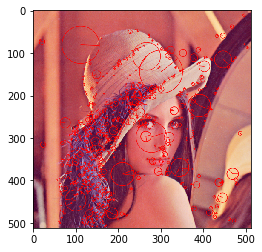

In [31]:
img2 = cv2.drawKeypoints(cv_gray,kp,None,(255,0,0),4)
plt.imshow(img2)
plt.show()

In [ ]:
def getSift(img):
    sift = cv2.xfeatures2d.SIFT_create()
    img = cv2.imread(img)
    cv_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(cv_gray,None)
    return des

# SURF (Speed-Up Robust Feature)

In [32]:
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv2.xfeatures2d_SURF.create(400)

In [33]:
kp, des = surf.detectAndCompute(cv_gray,None)

In [34]:
len(kp)

779

In [35]:
des.shape

(779, 64)

In [36]:
des[0]

array([-2.28132913e-03, -3.45774833e-03,  3.44262621e-03,  4.82206186e-03,
       -8.41338839e-03,  4.63588908e-03,  1.10540418e-02,  4.77435663e-02,
        1.44988624e-02,  1.61719765e-03,  1.60970576e-02,  2.78598033e-02,
        2.06192047e-03, -2.36250460e-03,  2.07581371e-03,  2.36465689e-03,
       -3.22839394e-02, -2.81215142e-02,  4.03272808e-02,  4.08339128e-02,
        1.56267136e-01,  1.00127131e-01,  2.82599002e-01,  4.54028577e-01,
       -6.35591894e-02,  2.39887014e-01,  1.96111739e-01,  3.98829103e-01,
        4.54433402e-03,  1.29395659e-04,  1.07766399e-02,  9.15563852e-03,
        2.46785581e-03,  5.31021156e-04,  2.45957263e-02,  1.97850075e-02,
        3.61646324e-01, -2.36214045e-02,  3.69772732e-01,  1.99582845e-01,
       -1.08081251e-01, -5.08199222e-02,  1.80342719e-01,  2.27500021e-01,
       -1.59609616e-02,  1.44530665e-02,  1.96078755e-02,  1.44530665e-02,
        1.05360744e-03,  7.61675648e-03,  1.80036039e-03,  7.66778877e-03,
        1.18112667e-02,  

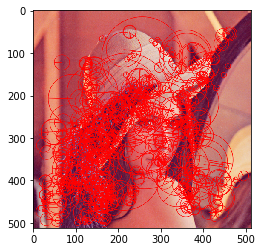

In [37]:
img2 = cv2.drawKeypoints(cv_gray,kp,None,(255,0,0),4)
plt.imshow(img2)
plt.show()

In [38]:
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv2.xfeatures2d_SURF.create(4000)

In [39]:
kp, des = surf.detectAndCompute(cv_gray,None)

In [40]:
len(kp)

81

In [41]:
des[0]

array([-2.28132913e-03, -3.45774833e-03,  3.44262621e-03,  4.82206186e-03,
       -8.41338839e-03,  4.63588908e-03,  1.10540418e-02,  4.77435663e-02,
        1.44988624e-02,  1.61719765e-03,  1.60970576e-02,  2.78598033e-02,
        2.06192047e-03, -2.36250460e-03,  2.07581371e-03,  2.36465689e-03,
       -3.22839394e-02, -2.81215142e-02,  4.03272808e-02,  4.08339128e-02,
        1.56267136e-01,  1.00127131e-01,  2.82599002e-01,  4.54028577e-01,
       -6.35591894e-02,  2.39887014e-01,  1.96111739e-01,  3.98829103e-01,
        4.54433402e-03,  1.29395659e-04,  1.07766399e-02,  9.15563852e-03,
        2.46785581e-03,  5.31021156e-04,  2.45957263e-02,  1.97850075e-02,
        3.61646324e-01, -2.36214045e-02,  3.69772732e-01,  1.99582845e-01,
       -1.08081251e-01, -5.08199222e-02,  1.80342719e-01,  2.27500021e-01,
       -1.59609616e-02,  1.44530665e-02,  1.96078755e-02,  1.44530665e-02,
        1.05360744e-03,  7.61675648e-03,  1.80036039e-03,  7.66778877e-03,
        1.18112667e-02,  

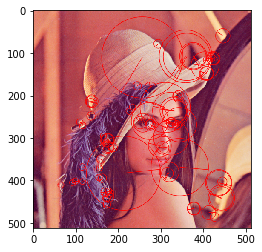

In [42]:
img2 = cv2.drawKeypoints(cv_gray,kp,None,(255,0,0),4)
plt.imshow(img2)
plt.show()

In [43]:
surf.descriptorSize()

64

In [44]:
des[0]

array([-2.28132913e-03, -3.45774833e-03,  3.44262621e-03,  4.82206186e-03,
       -8.41338839e-03,  4.63588908e-03,  1.10540418e-02,  4.77435663e-02,
        1.44988624e-02,  1.61719765e-03,  1.60970576e-02,  2.78598033e-02,
        2.06192047e-03, -2.36250460e-03,  2.07581371e-03,  2.36465689e-03,
       -3.22839394e-02, -2.81215142e-02,  4.03272808e-02,  4.08339128e-02,
        1.56267136e-01,  1.00127131e-01,  2.82599002e-01,  4.54028577e-01,
       -6.35591894e-02,  2.39887014e-01,  1.96111739e-01,  3.98829103e-01,
        4.54433402e-03,  1.29395659e-04,  1.07766399e-02,  9.15563852e-03,
        2.46785581e-03,  5.31021156e-04,  2.45957263e-02,  1.97850075e-02,
        3.61646324e-01, -2.36214045e-02,  3.69772732e-01,  1.99582845e-01,
       -1.08081251e-01, -5.08199222e-02,  1.80342719e-01,  2.27500021e-01,
       -1.59609616e-02,  1.44530665e-02,  1.96078755e-02,  1.44530665e-02,
        1.05360744e-03,  7.61675648e-03,  1.80036039e-03,  7.66778877e-03,
        1.18112667e-02,  

In [45]:
surf.getExtended()

False

In [46]:
surf.setExtended(True)

In [47]:
kp, des = surf.detectAndCompute(cv_gray,None)
len(kp)

81

In [92]:
des[0]

array([-4.73352302e-05,  1.61620890e-04,  2.99585983e-04,  9.63852624e-04,
       -2.43687173e-04,  3.27994290e-04, -4.91160063e-05,  8.74111793e-05,
        4.11420986e-02,  4.34227921e-02,  7.79154943e-03,  1.05961980e-02,
        7.43869110e-04,  2.02412810e-03, -2.11464547e-04,  5.47583099e-04,
       -3.38908797e-03,  3.40130460e-03, -1.00552694e-04,  2.62217189e-04,
       -1.30203654e-04,  1.42420235e-04,  7.99234316e-04,  9.93944937e-04,
        1.50965512e-04,  2.02823940e-04,  8.48163108e-05,  1.78801187e-04,
       -3.73036091e-05,  2.26366566e-04, -6.73713657e-06,  8.50585129e-05,
       -2.22787238e-03,  5.57252532e-03,  4.03767824e-03,  6.96178153e-03,
       -2.33925646e-04,  1.06094370e-03,  1.49873478e-04,  6.37224002e-04,
        4.35831308e-01,  4.50807750e-01, -9.29736998e-03,  1.08169522e-02,
        1.36639044e-01,  1.38766453e-01, -2.04545283e-03,  2.04545283e-03,
       -1.06355160e-01,  1.06720343e-01, -7.95210991e-03,  7.95210991e-03,
       -1.05999759e-03,  

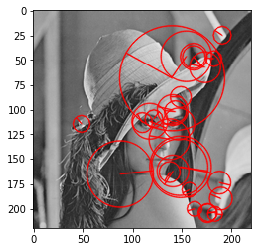

In [93]:
img2 = cv2.drawKeypoints(cv_gray,kp,None,(255,0,0),4)
plt.imshow(img2)
plt.show()

In [94]:
des.shape

(28, 128)

In [95]:
des[20]

array([ 1.23401769e-04,  6.54187286e-04, -1.38412433e-05,  7.43662880e-04,
       -4.09054483e-04,  6.31589023e-03, -8.14568810e-03,  1.05836969e-02,
        7.51570007e-03,  1.17925974e-02, -4.09079762e-03,  8.18422437e-03,
        1.73209049e-02,  1.96907818e-02,  1.57287135e-03,  2.31389627e-02,
        2.61079380e-03,  1.63409375e-02, -1.12535264e-02,  1.12535264e-02,
        2.42403969e-02,  2.42403969e-02,  1.34583330e-02,  2.05297973e-02,
       -2.18920686e-04,  1.43980829e-03,  5.35084750e-04,  6.99226453e-04,
        3.82306124e-03,  5.20740310e-03,  2.40379665e-03,  2.99713132e-03,
       -4.56540249e-02,  4.82958928e-02, -4.14798595e-03,  4.14798595e-03,
        2.96313432e-03,  2.96313432e-03,  1.81565043e-02,  3.61286663e-02,
       -1.09871551e-01,  1.47861660e-01,  2.11261064e-01,  2.78737724e-01,
       -1.26331910e-01,  4.16665494e-01,  1.03906199e-01,  1.86419919e-01,
        1.46765374e-02,  1.69169270e-02,  2.40968600e-01,  2.56464452e-01,
       -1.01454400e-01,  